Assignment 3 - Implement Image classification using convolutional neural networks (CNNs) for multiclass
classification

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import classification_report

In [2]:
# 1. Load CIFAR-10 Dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [4]:
# 2.Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.

In [5]:
# 3.Flatten labels
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

In [6]:
# 4.Class names
class_names = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

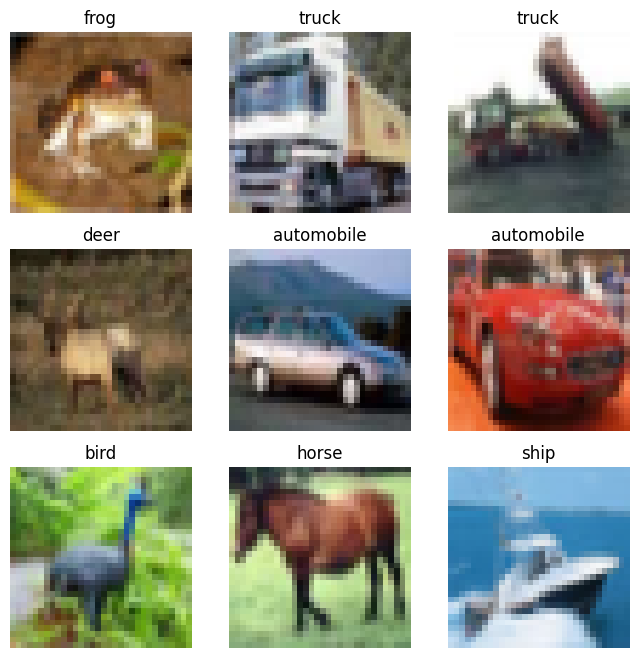

In [7]:
# 5. Show sample images
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i]])
    plt.axis("off")
plt.show()

In [9]:
# 6. Build CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes
])





In [10]:
# 7. Compile Model
# ------------------------------
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
# 8. Train Model
# ------------------------------
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test),
                    batch_size=64)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 101ms/step - accuracy: 0.3188 - loss: 1.8315 - val_accuracy: 0.5267 - val_loss: 1.3239
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 73s 90ms/step - accuracy: 0.5469 - loss: 1.2741 - val_accuracy: 0.6059 - val_loss: 1.1214
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 91ms/step - accuracy: 0.6120 - loss: 1.1030 - val_accuracy: 0.6155 - val_loss: 1.0812
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 92ms/step - accuracy: 0.6463 - loss: 1.0028 - val_accuracy: 0.6602 - val_loss: 0.9654
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 77s 86ms/step - accuracy: 0.6700 - loss: 0.9350 - val_accuracy: 0.6602 - val_loss: 0.9725
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 86ms/step - accuracy: 0.6923 - loss: 0.8701 - val_accuracy: 0.6806 - val_loss: 0.9012
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 88ms/step - accuracy: 0.7186 - loss: 0.8064 - val_accuracy: 0.6649 - val_loss: 0.9784
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 91ms/step - accuracy: 0.7376 - loss: 0.7632 -

In [12]:
# 9. Evaluate Model
# ------------------------------
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.2f}")

313/313 - 4s - 13ms/step - accuracy: 0.7078 - loss: 0.8377
Test Accuracy: 0.71


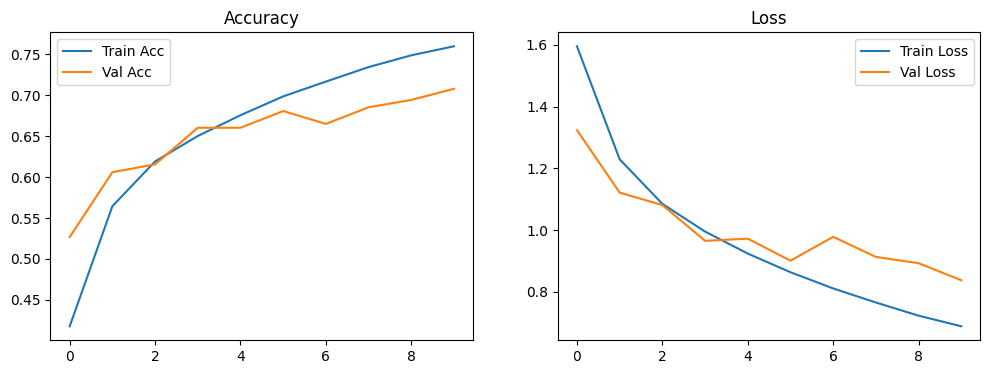

In [13]:
# 10. Plot Training History
# ------------------------------
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.legend()

plt.show()

In [14]:
# 11. Classification Report
# ------------------------------
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_classes, target_names=class_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step

Classification Report:

              precision    recall  f1-score   support

    airplane       0.68      0.80      0.73      1000
  automobile       0.78      0.86      0.82      1000
        bird       0.54      0.65      0.59      1000
         cat       0.56      0.54      0.55      1000
        deer       0.71      0.61      0.65      1000
         dog       0.69      0.55      0.61      1000
        frog       0.79      0.78      0.79      1000
       horse       0.78      0.74      0.76      1000
        ship       0.83      0.77      0.80      1000
       truck       0.76      0.79      0.78      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000

